# Innomatics  - Hackathon


In [1]:
%pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import json
import os

os.chdir(r'c:\Users\minha\innomatics-food-delivery-hackathon')

 Step 1: Load CSV Data


In [3]:

orders_df = pd.read_csv('orders.csv')
print("Orders Data Shape:", orders_df.shape)
print("\nOrders Data Preview:")
print(orders_df.head())
print("\nOrders Data Info:")
print(orders_df.info())

Orders Data Shape: (10000, 6)

Orders Data Preview:
   order_id  user_id  restaurant_id  order_date  total_amount  \
0         1     2508            450  18-02-2023        842.97   
1         2     2693            309  18-01-2023        546.68   
2         3     2084            107  15-07-2023        163.93   
3         4      319            224  04-10-2023       1155.97   
4         5     1064            293  25-12-2023       1321.91   

                  restaurant_name  
0               New Foods Chinese  
1  Ruchi Curry House Multicuisine  
2           Spice Kitchen Punjabi  
3          Darbar Kitchen Non-Veg  
4       Royal Eatery South Indian  

Orders Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_id         10000 non-null  int64  
 1   user_id          10000 non-null  int64  
 2   restaurant_id    10000 non

 Step 2: Load JSON Data


In [4]:
with open('users.json', 'r') as f:
    users_data = json.load(f)

users_df = pd.DataFrame(users_data)
print("Users Data Shape:", users_df.shape)
print("\nUsers Data Preview:")
print(users_df.head())
print("\nUsers Data Info:")
print(users_df.info())

Users Data Shape: (3000, 4)

Users Data Preview:
   user_id    name       city membership
0        1  User_1    Chennai    Regular
1        2  User_2       Pune       Gold
2        3  User_3  Bangalore       Gold
3        4  User_4  Bangalore    Regular
4        5  User_5       Pune       Gold

Users Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     3000 non-null   int64 
 1   name        3000 non-null   object
 2   city        3000 non-null   object
 3   membership  3000 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.9+ KB
None


 Step 3: Load SQL Data


In [5]:

with open('restaurants.sql', 'r') as f:
    sql_content = f.read()

conn = sqlite3.connect(':memory:')
cursor = conn.cursor()


for statement in sql_content.split(';'):
    if statement.strip():
        cursor.execute(statement)

restaurants_df = pd.read_sql_query('SELECT * FROM restaurants', conn)
conn.close()

print("Restaurants Data Shape:", restaurants_df.shape)
print("\nRestaurants Data Preview:")
print(restaurants_df.head())
print("\nRestaurants Data Info:")
print(restaurants_df.info())

Restaurants Data Shape: (500, 4)

Restaurants Data Preview:
   restaurant_id restaurant_name  cuisine  rating
0              1    Restaurant_1  Chinese     4.8
1              2    Restaurant_2   Indian     4.1
2              3    Restaurant_3  Mexican     4.3
3              4    Restaurant_4  Chinese     4.1
4              5    Restaurant_5  Chinese     4.8

Restaurants Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   restaurant_id    500 non-null    int64  
 1   restaurant_name  500 non-null    object 
 2   cuisine          500 non-null    object 
 3   rating           500 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB
None


 Step 4: Merge the Datasets


In [6]:
merged_df = orders_df.merge(users_df, on='user_id', how='left')
print("After merging with users:")
print("Shape:", merged_df.shape)
print("\nColumns:", merged_df.columns.tolist())


final_df = merged_df.merge(restaurants_df, on='restaurant_id', how='left')
print("\n\nAfter merging with restaurants:")
print("Shape:", final_df.shape)
print("\nColumns:", final_df.columns.tolist())

After merging with users:
Shape: (10000, 9)

Columns: ['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount', 'restaurant_name', 'name', 'city', 'membership']


After merging with restaurants:
Shape: (10000, 12)

Columns: ['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount', 'restaurant_name_x', 'name', 'city', 'membership', 'restaurant_name_y', 'cuisine', 'rating']


Step 5: Data Cleaning and Preparation


In [7]:

if 'restaurant_name_x' in final_df.columns:
    final_df = final_df.drop('restaurant_name_x', axis=1)
    final_df = final_df.rename(columns={'restaurant_name_y': 'restaurant_name'})
elif 'restaurant_name_y' in final_df.columns:
    final_df = final_df.drop('restaurant_name_y', axis=1)
    final_df = final_df.rename(columns={'restaurant_name_x': 'restaurant_name'})


final_df['order_date'] = pd.to_datetime(final_df['order_date'], format='%d-%m-%Y')

print("Final Dataset Shape:", final_df.shape)
print("\nFinal Dataset Columns:")
print(final_df.columns.tolist())
print("\nFinal Dataset Preview:")
print(final_df.head(10))
print("\nFinal Dataset Info:")
print(final_df.info())

Final Dataset Shape: (10000, 11)

Final Dataset Columns:
['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount', 'name', 'city', 'membership', 'restaurant_name', 'cuisine', 'rating']

Final Dataset Preview:
   order_id  user_id  restaurant_id order_date  total_amount       name  \
0         1     2508            450 2023-02-18        842.97  User_2508   
1         2     2693            309 2023-01-18        546.68  User_2693   
2         3     2084            107 2023-07-15        163.93  User_2084   
3         4      319            224 2023-10-04       1155.97   User_319   
4         5     1064            293 2023-12-25       1321.91  User_1064   
5         6     2933            499 2023-07-12       1497.22  User_2933   
6         7      970             35 2023-05-30        129.21   User_970   
7         8      891             57 2023-11-07        269.19   User_891   
8         9      364              7 2023-12-05        953.30   User_364   
9        10     2972        

Step 6: Save Final Dataset


In [8]:

final_df.to_csv('final_food_delivery_dataset.csv', index=False)
print(" Final dataset saved as 'final_food_delivery_dataset.csv'")
print(f"Total records in final dataset: {len(final_df)}")
print(f"\nDataset Statistics:")
print(f"- Total Orders: {len(final_df)}")
print(f"- Total Users: {final_df['user_id'].nunique()}")
print(f"- Total Restaurants: {final_df['restaurant_id'].nunique()}")
print(f"- Date Range: {final_df['order_date'].min()} to {final_df['order_date'].max()}")

 Final dataset saved as 'final_food_delivery_dataset.csv'
Total records in final dataset: 10000

Dataset Statistics:
- Total Orders: 10000
- Total Users: 2883
- Total Restaurants: 500
- Date Range: 2023-01-01 00:00:00 to 2024-01-01 00:00:00


 Step 7: Exploratory Data Analysis


In [9]:


print("="*80)
print("EXPLORATORY DATA ANALYSIS - FINAL FOOD DELIVERY DATASET")
print("="*80)


print("\n1️  ORDER TRENDS OVER TIME")
print("-" * 80)
final_df['order_month'] = final_df['order_date'].dt.to_period('M')
orders_by_month = final_df.groupby('order_month').size()
print(orders_by_month)


print("\n\n2️  USER BEHAVIOR PATTERNS")
print("-" * 80)
user_stats = final_df.groupby('user_id').agg({
    'order_id': 'count',
    'total_amount': ['sum', 'mean', 'max']
}).round(2)
user_stats.columns = ['Orders_Count', 'Total_Spent', 'Avg_Order_Value', 'Max_Order_Value']
print("Top 10 Users by Total Spent:")
print(user_stats.nlargest(10, 'Total_Spent'))


print("\n\n3️  CITY-WISE PERFORMANCE")
print("-" * 80)
city_stats = final_df.groupby('city').agg({
    'order_id': 'count',
    'total_amount': ['sum', 'mean']
}).round(2)
city_stats.columns = ['Total_Orders', 'Revenue', 'Avg_Order_Value']
city_stats = city_stats.sort_values('Revenue', ascending=False)
print(city_stats)

print("\n\n4️  CUISINE-WISE PERFORMANCE")
print("-" * 80)
cuisine_stats = final_df.groupby('cuisine').agg({
    'order_id': 'count',
    'total_amount': ['sum', 'mean'],
    'rating': 'mean'
}).round(2)
cuisine_stats.columns = ['Total_Orders', 'Revenue', 'Avg_Order_Value', 'Avg_Rating']
cuisine_stats = cuisine_stats.sort_values('Revenue', ascending=False)
print(cuisine_stats)


print("\n\n5️  MEMBERSHIP IMPACT (GOLD vs REGULAR)")
print("-" * 80)
membership_stats = final_df.groupby('membership').agg({
    'order_id': 'count',
    'total_amount': ['sum', 'mean']
}).round(2)
membership_stats.columns = ['Total_Orders', 'Total_Revenue', 'Avg_Order_Value']
print(membership_stats)


print("\n\n6️  TOP 10 RESTAURANTS BY REVENUE")
print("-" * 80)
restaurant_stats = final_df.groupby(['restaurant_id', 'restaurant_name', 'cuisine', 'rating']).agg({
    'order_id': 'count',
    'total_amount': ['sum', 'mean']
}).round(2)
restaurant_stats.columns = ['Orders', 'Total_Revenue', 'Avg_Order_Value']
restaurant_stats = restaurant_stats.sort_values('Total_Revenue', ascending=False)
print(restaurant_stats.head(10))

EXPLORATORY DATA ANALYSIS - FINAL FOOD DELIVERY DATASET

1️  ORDER TRENDS OVER TIME
--------------------------------------------------------------------------------
order_month
2023-01    804
2023-02    785
2023-03    903
2023-04    812
2023-05    844
2023-06    784
2023-07    859
2023-08    851
2023-09    812
2023-10    863
2023-11    807
2023-12    849
2024-01     27
Freq: M, dtype: int64


2️  USER BEHAVIOR PATTERNS
--------------------------------------------------------------------------------
Top 10 Users by Total Spent:
         Orders_Count  Total_Spent  Avg_Order_Value  Max_Order_Value
user_id                                                             
1515               12     11556.49           963.04          1427.51
650                10     10747.44          1074.74          1478.62
496                11      9634.30           875.85          1381.03
2586               10      9486.61           948.66          1408.48
2615                9      9237.32          1026.37  

Step 8: Data Visualizations


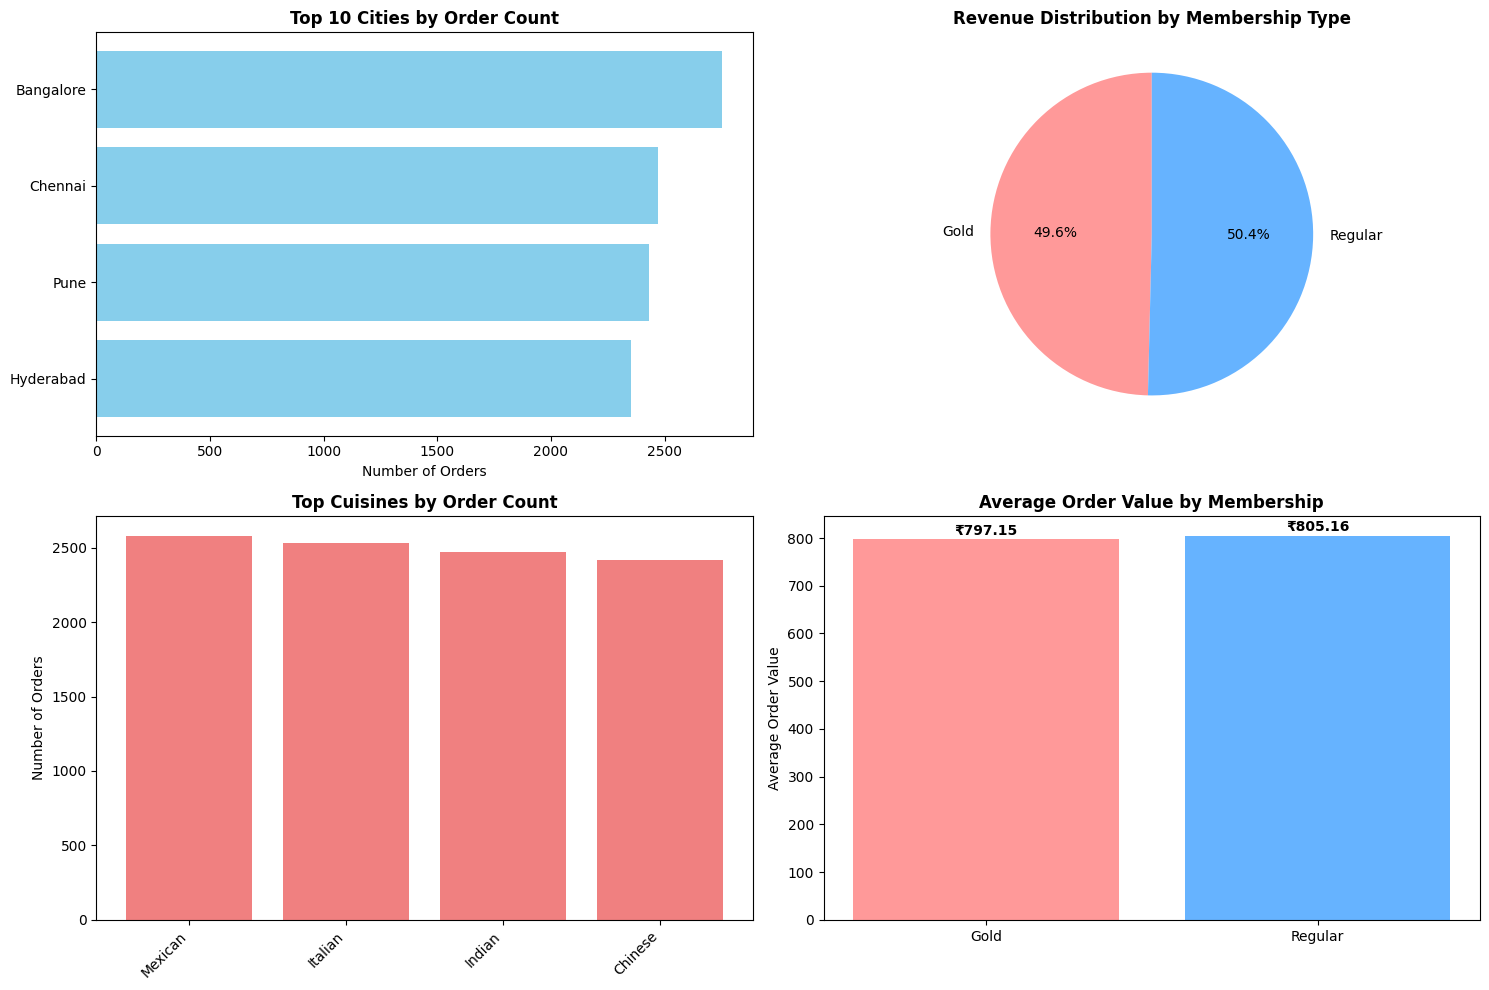

In [14]:

plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))


city_orders = final_df.groupby('city').size().sort_values(ascending=False).head(10)
axes[0, 0].barh(city_orders.index, city_orders.values, color='skyblue')
axes[0, 0].set_xlabel('Number of Orders')
axes[0, 0].set_title('Top 10 Cities by Order Count', fontweight='bold')
axes[0, 0].invert_yaxis()


membership_revenue = final_df.groupby('membership')['total_amount'].sum()
axes[0, 1].pie(membership_revenue.values, labels=membership_revenue.index, autopct='%1.1f%%',
               colors=['#ff9999', '#66b3ff'], startangle=90)
axes[0, 1].set_title('Revenue Distribution by Membership Type', fontweight='bold')


cuisine_orders = final_df.groupby('cuisine').size().sort_values(ascending=False).head(8)
axes[1, 0].bar(range(len(cuisine_orders)), cuisine_orders.values, color='lightcoral')
axes[1, 0].set_xticks(range(len(cuisine_orders)))
axes[1, 0].set_xticklabels(cuisine_orders.index, rotation=45, ha='right')
axes[1, 0].set_ylabel('Number of Orders')
axes[1, 0].set_title('Top Cuisines by Order Count', fontweight='bold')

membership_avg = final_df.groupby('membership')['total_amount'].mean()
axes[1, 1].bar(membership_avg.index, membership_avg.values, color=['#ff9999', '#66b3ff'])
axes[1, 1].set_ylabel('Average Order Value')
axes[1, 1].set_title('Average Order Value by Membership', fontweight='bold')
for i, v in enumerate(membership_avg.values):
    axes[1, 1].text(i, v + 10, f'₹{v:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('food_delivery_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

